# What drives the price of a car?

![](https://github.com/mmr-ai/ucbmlai/blob/main/M11/images/kurt.jpeg?raw=1)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Business Understanding: Used Car Price Analysis

This project can be framed as a **supervised regression analysis** to identify and quantify factors influencing used car prices. Here's the technical translation of our business objective:

## Core Technical Objectives

1. Develop a regression model with price as the target variable, using vehicle characteristics as predictors
2. Quantify the statistical significance and relative importance of different features in determining car prices
3. Generate interpretable coefficients that can translate to actionable business insights

## Success Criteria

* Statistical Performance: Achieve robust R² and RMSE metrics to ensure reliable predictions
* Feature Interpretability: Clear understanding of how each variable influences price
* Business Value: Deliver actionable insights for inventory selection and pricing strategy

## Methodology Approach

We'll combine predictive modeling with statistical inference to:
* Identify key price drivers
* Quantify their impact
* Provide evidence-based recommendations for inventory decisions

This framework ensures we deliver both accurate price predictions and practical insights that the dealership can implement in their business operations.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### **Reading in the data...**


In [ ]:
import pandas as pd
import os

# Check if running in Google Colab
try:
    import google.colab
    print('Running in Google Colab')
    colab = True
except ImportError:
    print('Not running in Google Colab')
    colab = False

# Set file path based on environment
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/DS-ML-AI/mini-assignment/data/vehicles.csv'
else:
    file_path = 'data/vehicles.csv'
print(f'File path set to: {file_path}')

# Load the data
if os.path.exists(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"File loaded successfully. Shape: {df.shape}")
    except Exception as e:
        print(f"Error reading the file: {e}")
else:
    print(f"File not found at: {file_path}")
    # You might want to check alternative locations
    alt_path = './vehicles.csv'  # Try current directory
    if os.path.exists(alt_path):
        df = pd.read_csv(alt_path)
        print(f"File loaded from alternative path. Shape: {df.shape}")


Running in Google Colab
Mounted at /content/drive
File path set to: /content/drive/MyDrive/DS-ML-AI/mini-assignment/data/vehicles.csv
File loaded successfully. Shape: (426880, 18)


I  was initially not able to run this on my laptop, but later figured it was because of bad data, either way I moved the assignment to collab, and updated the code to load data off the drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df.shape

(426880, 18)

## Data exploration and cleanup...

In [ ]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [ ]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
df.sample(n=20)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
347016,7315387625,greenville / upstate,45989,2014.0,chevrolet,camaro,NaN,8 cylinders,gas,13338.0,clean,manual,NaN,rwd,compact,coupe,red,sc
321008,7315292081,oregon coast,31990,2010.0,porsche,cayenne,NaN,NaN,gas,110580.0,clean,NaN,WP1AC2AP1ALA80376,NaN,NaN,SUV,grey,or
198968,7314805645,flint,9995,2009.0,gmc,yukon,NaN,NaN,gas,177958.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,mi
62152,7316447777,SF bay area,4996,2006.0,ford,taurus,excellent,6 cylinders,gas,110285.0,clean,automatic,1FAFP56U66A157344,fwd,full-size,sedan,blue,ca
218253,7314896599,gulfport / biloxi,8750,2011.0,gmc,sierra 1500,good,8 cylinders,gas,200000.0,clean,automatic,NaN,rwd,full-size,truck,white,ms
34887,7315892877,los angeles,9000,2005.0,toyota,highlander v6 limted,like new,6 cylinders,gas,91928.0,clean,automatic,JTEDP21A650067981,fwd,full-size,SUV,white,ca
403870,7310821761,kennewick-pasco-richland,0,2020.0,jeep,grand cherokee,NaN,6 cylinders,gas,46873.0,clean,automatic,1C4RJFBG1LC288647,4wd,NaN,SUV,NaN,wa
142398,7314544518,chicago,18500,2014.0,mercedes-benz,e-class,excellent,NaN,gas,86376.0,clean,automatic,WDDHF8JB2EB076644,4wd,NaN,sedan,blue,il
383483,7311257442,tyler / east TX,7950,2006.0,nissan,pathfinder se,excellent,6 cylinders,gas,124750.0,clean,automatic,NaN,NaN,NaN,NaN,silver,tx
210685,7309844093,bemidji,6995,2007.0,nissan,exterra,NaN,NaN,gas,158000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,mn


In [ ]:
df.dtypes

,0
id,int64
region,object
price,int64
year,float64
manufacturer,object
model,object
condition,object
cylinders,object
fuel,object
odometer,float64


In [ ]:
df.isnull().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [ ]:
(df.isnull().sum() / df.shape[0]) * 100

,0
id,0.000000
region,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


In [ ]:
df.sample(n=10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
143557,7308150396,peoria,4850,2006.0,honda,civic hybrid,good,4 cylinders,hybrid,104200.0,clean,automatic,NaN,fwd,mid-size,sedan,silver,il
254026,7314987556,north jersey,14199,2010.0,jeep,wrangler,NaN,NaN,gas,127379.0,clean,NaN,1J4AA2D16AL100503,4wd,NaN,SUV,black,nj
1420,7305517981,birmingham,29500,2016.0,ford,mustang,NaN,8 cylinders,gas,36772.0,clean,automatic,1FA6P8CF7G5283231,rwd,NaN,coupe,blue,al
230043,7315472667,asheville,33590,2014.0,toyota,tundra crewmax sr5 pickup,good,NaN,other,55251.0,clean,other,5TFEY5F15EX169621,NaN,NaN,pickup,red,nc
263605,7316374129,albany,15900,2006.0,toyota,tacoma 4wd,excellent,6 cylinders,gas,134972.0,clean,manual,5TEUU42N06Z228742,4wd,mid-size,pickup,grey,ny
310460,7303727949,tulsa,23590,2016.0,volvo,xc70 t5 classic platinum,good,NaN,gas,70223.0,clean,automatic,YV440MBY3G1261877,fwd,NaN,wagon,brown,ok
409568,7316327288,seattle-tacoma,29995,2019.0,gmc,savana 2500 cargo van,like new,8 cylinders,gas,13152.0,clean,automatic,1GTW7AFG5K1293441,rwd,full-size,van,white,wa
199615,7306914977,flint,27300,2017.0,NaN,Colorado,excellent,6 cylinders,gas,16300.0,clean,automatic,NaN,4wd,NaN,truck,red,mi
184703,7304584059,frederick,750,1999.0,toyota,corolla,fair,4 cylinders,gas,327799.0,clean,manual,NaN,fwd,NaN,sedan,black,md
204060,7302669732,jackson,10983,2014.0,ford,fusion hybrid se,excellent,4 cylinders,hybrid,100632.0,NaN,automatic,3FA6P0LU9ER351085,NaN,NaN,other,NaN,mi


In [ ]:
df.describe(include='all')


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

* Data Cleanup and ordering...

looking at the business case, I dont think there is any need of the columns which are unique to the car like VIN and id.

The size column 71% records are empty to dropping it

In [ ]:
# drop unique and emoty cols
columns_to_drop = ['size', 'VIN', 'id']
df_clean = df.drop(columns=columns_to_drop)

In [ ]:
df_clean.sample(n=5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
89968,"washington, DC",4995,2012.0,kia,forte lx,excellent,4 cylinders,gas,182078.0,clean,automatic,fwd,NaN,NaN,dc
343660,rhode island,6499,2009.0,honda,civic,NaN,NaN,gas,139000.0,clean,manual,NaN,NaN,NaN,ri
399527,winchester,24000,1936.0,ford,NaN,excellent,8 cylinders,gas,99999.0,clean,automatic,rwd,sedan,custom,va
155428,terre haute,34990,2019.0,bmw,3 series 330i xdrive sedan,good,NaN,gas,8484.0,clean,manual,NaN,sedan,black,in
297799,columbus,20995,2014.0,jeep,grand cherokee,NaN,NaN,gas,69693.0,clean,automatic,4wd,NaN,NaN,oh


EDA on the current state of data, picture is better than a thousand records

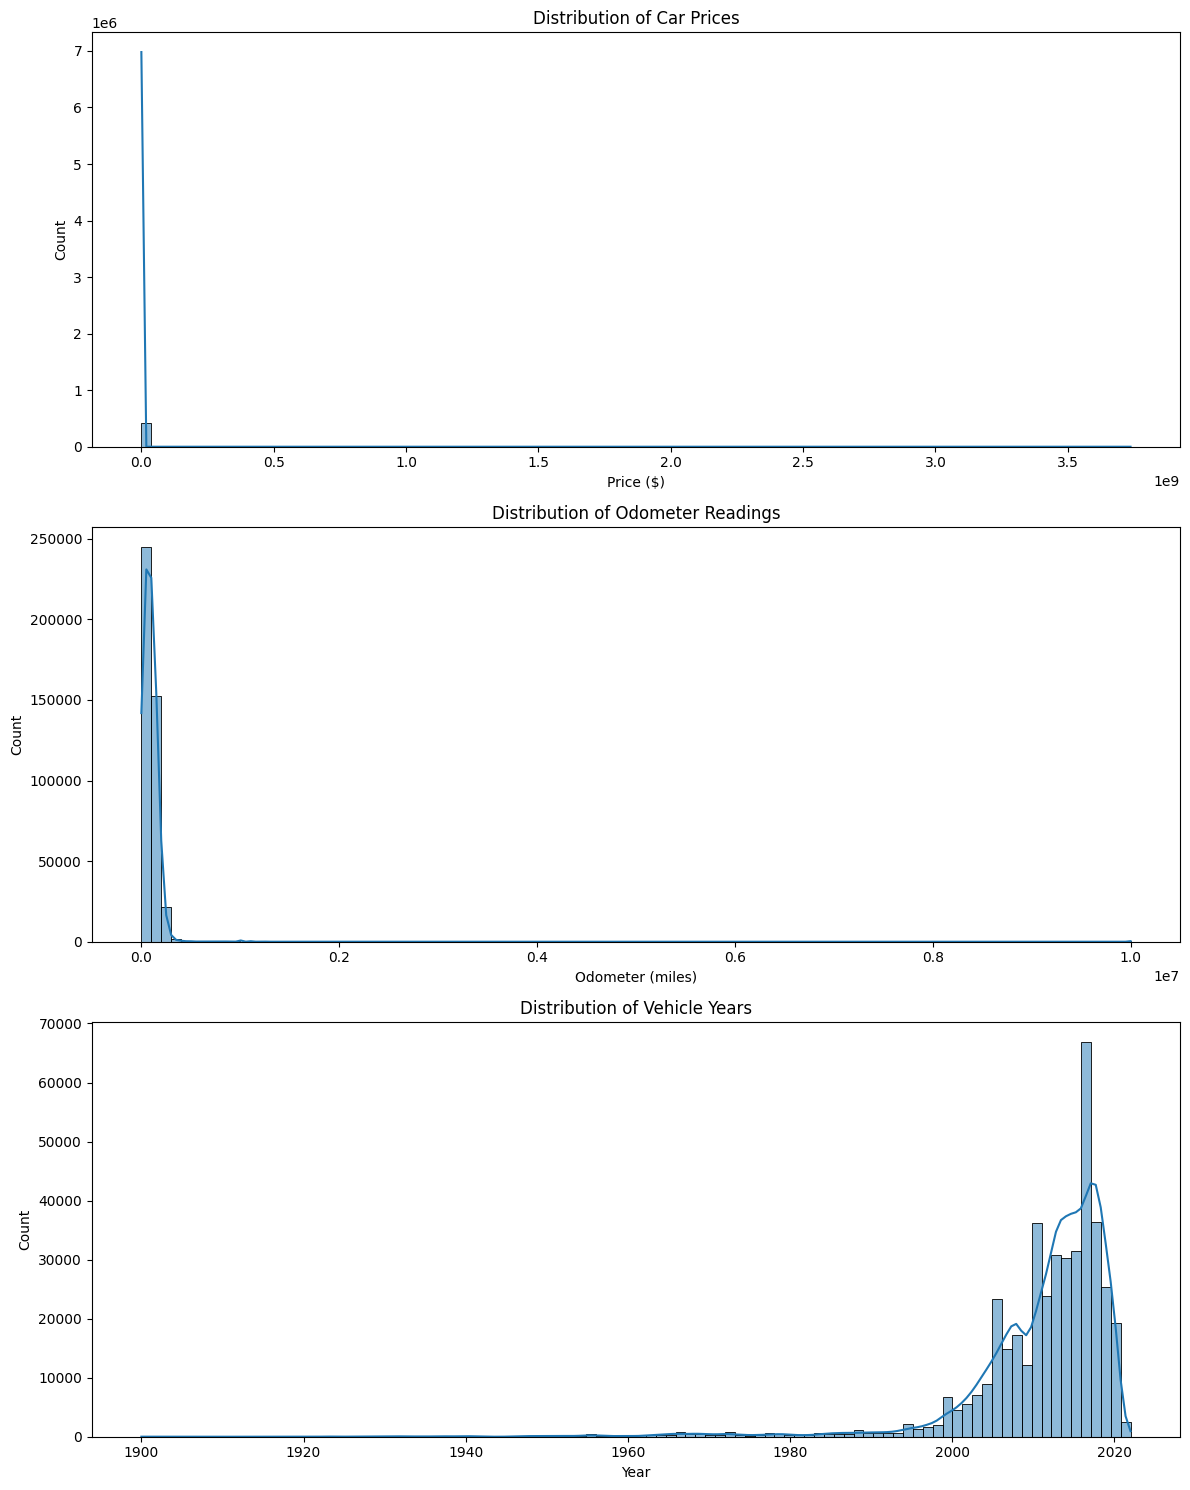

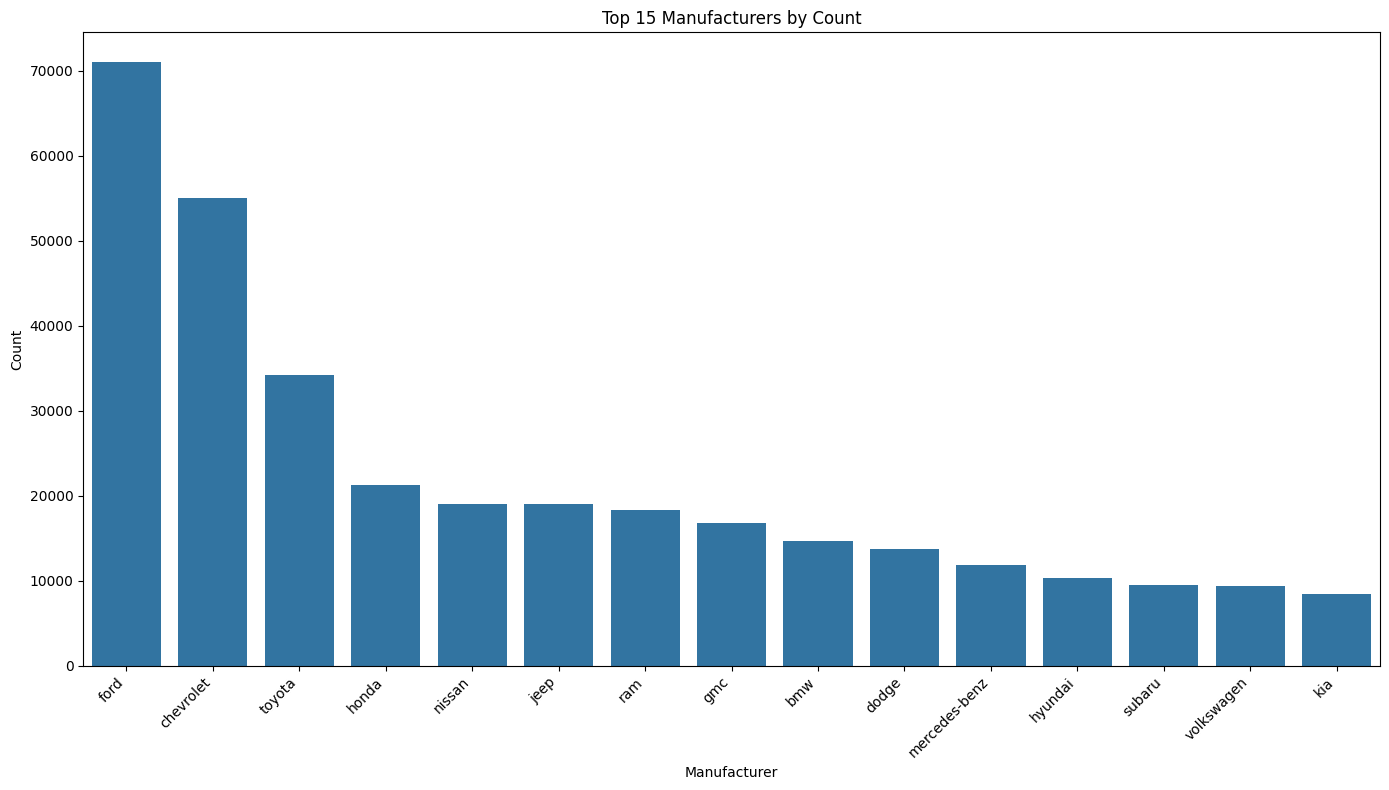

In [ ]:
# Histograms for numeric variables
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Price distribution
sns.histplot(data=df_clean, x='price', bins=100, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Car Prices')
axes[0].set_xlabel('Price ($)')

# Odometer distribution
sns.histplot(data=df_clean, x='odometer',bins=100, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Odometer Readings')
axes[1].set_xlabel('Odometer (miles)')

# Year distribution
sns.histplot(data=df_clean, x='year',bins=100, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Vehicle Years')
axes[2].set_xlabel('Year')

plt.tight_layout()
plt.show()

# Manufacturer distribution (bar chart)
plt.figure(figsize=(14, 8))
manufacturer_counts = df_clean['manufacturer'].value_counts().head(15)
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values)
plt.title('Top 15 Manufacturers by Count')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Looks like there are a lot of outliers... lets eliminate those

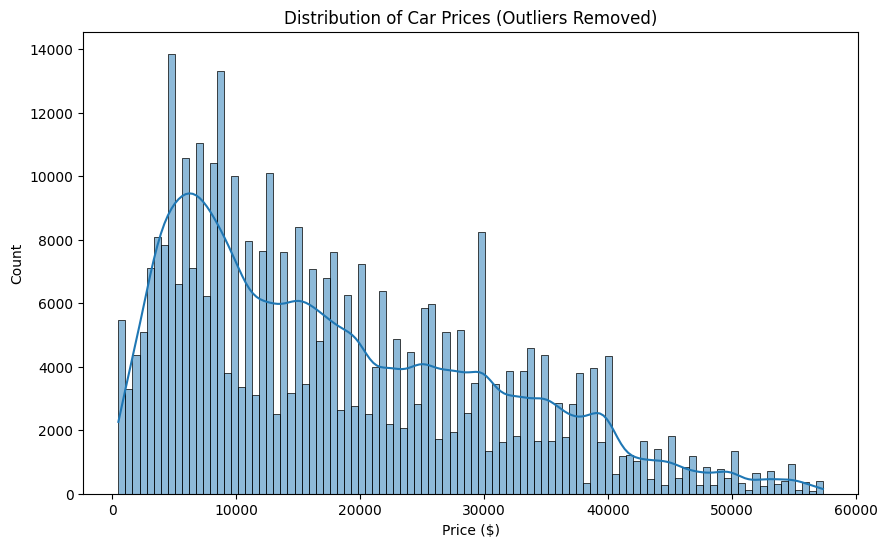

In [ ]:
# Calculate quartiles
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Setting a minimum threshold for price (at least $500)
min_threshold = max(lower_bound, 500)

# Filter out outliers
df_filtered = df_clean[(df_clean['price'] >= min_threshold) & (df_clean['price'] <= upper_bound)]


# Plot the filtered price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='price', kde=True, bins=100)
plt.title('Distribution of Car Prices (Outliers Removed)')
plt.xlabel('Price ($)')
plt.show()

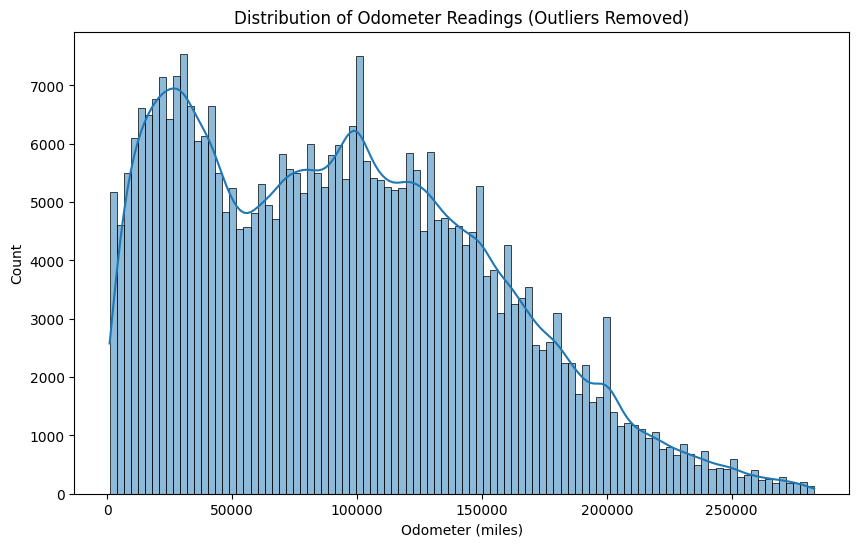

In [ ]:
# Calculate quartiles for odometer
Q1_odo = df_filtered['odometer'].quantile(0.25)
Q3_odo = df_filtered['odometer'].quantile(0.75)
IQR_odo = Q3_odo - Q1_odo

# Define both lower and upper bounds for odometer outliers
lower_bound_odo = max(0, Q1_odo - 1.5 * IQR_odo,1000)  # Ensure non-negative and > 1000
upper_bound_odo = Q3_odo + 1.5 * IQR_odo

# Filter out odometer outliers with both bounds
df_clean = df_filtered[(df_filtered['odometer'] >= lower_bound_odo) &
                       (df_filtered['odometer'] <= upper_bound_odo)]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='odometer', bins=100, kde=True)
plt.title('Distribution of Odometer Readings (Outliers Removed)')
plt.xlabel('Odometer (miles)')
plt.show()


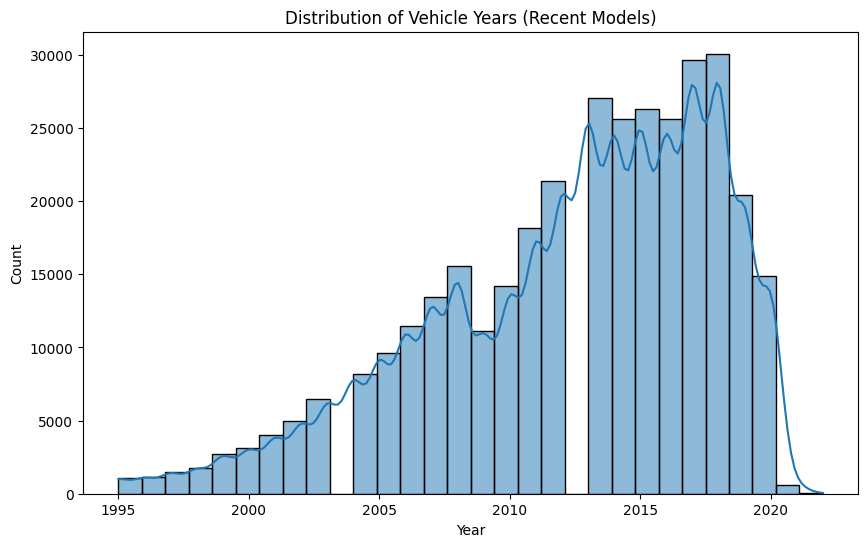

In [ ]:

# First make sure df_filtered exists (from previous price filtering)
# Then filter by odometer to create df_clean
# Now filter by year
current_year = 2025
lower_bound_year = current_year - 30  #
# 40 years old car !, 20 is a good  number but I see that the distribution is a bit of a bell curve,
# 30 is a better number, but right now just testing at 40y

# Filter by year
df_final = df_clean[df_clean['year'] >= lower_bound_year]


# Plot the year distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='year', bins=int(current_year-df_final['year'].min()), kde=True)
plt.title('Distribution of Vehicle Years (Recent Models)')
plt.xlabel('Year')
plt.show()

# MMR

- 40 years old car !, 20 is a good  number but I see that the distribution is a bit of a bell curve,
- 30 is a better number, but right now just testing at 40y

In [ ]:
# Adding a derived column 'cage' to the dataframe (car age)
current_year = 2025  # Current year
df['cage'] = current_year - df_final['year']

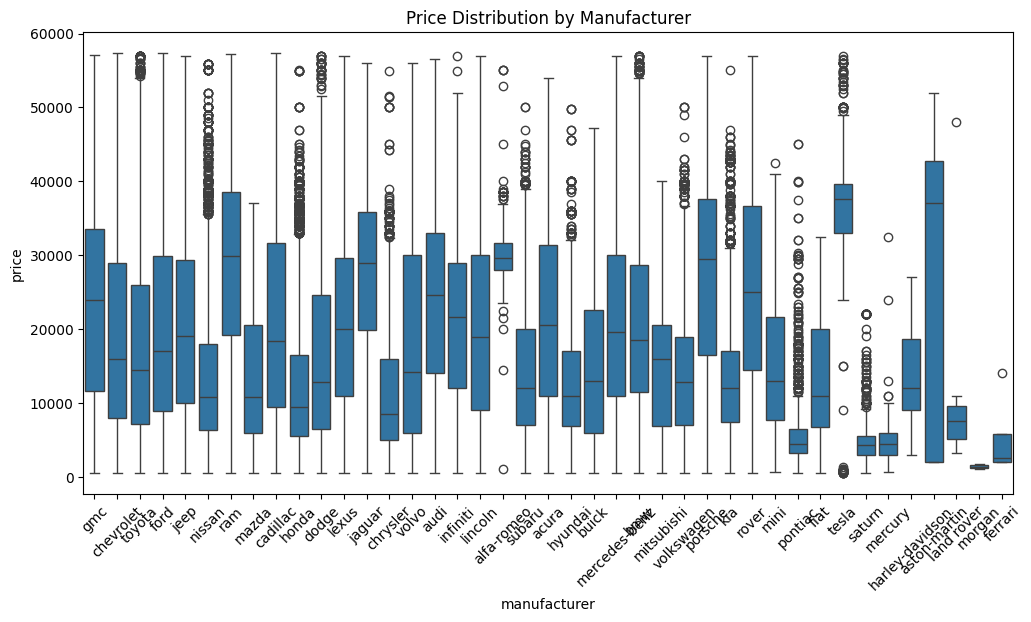

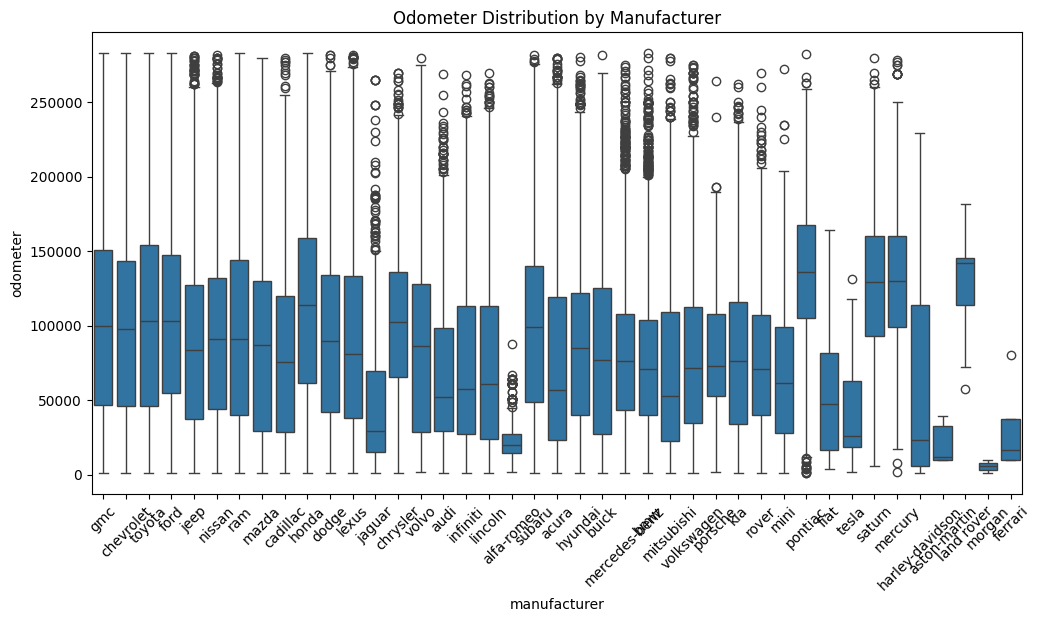

<ipython-input-20-37a76c287809>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cage'] = current_year - df_final['year']


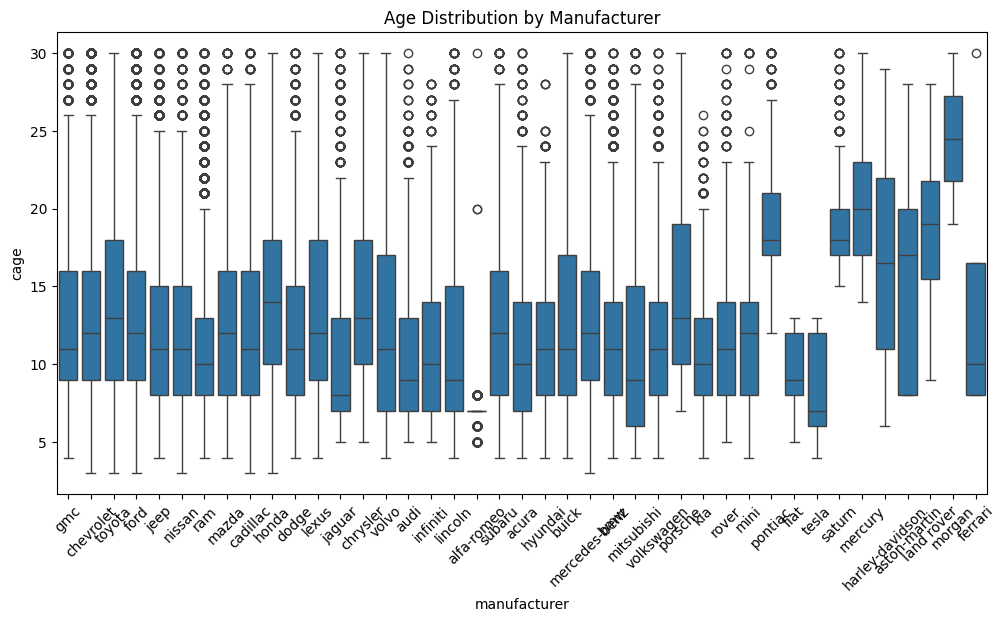

<ipython-input-20-37a76c287809>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(iqr_filter)
<ipython-input-20-37a76c287809>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(iqr_filter)
<ipython-input-20-37a76c287809>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. Thi

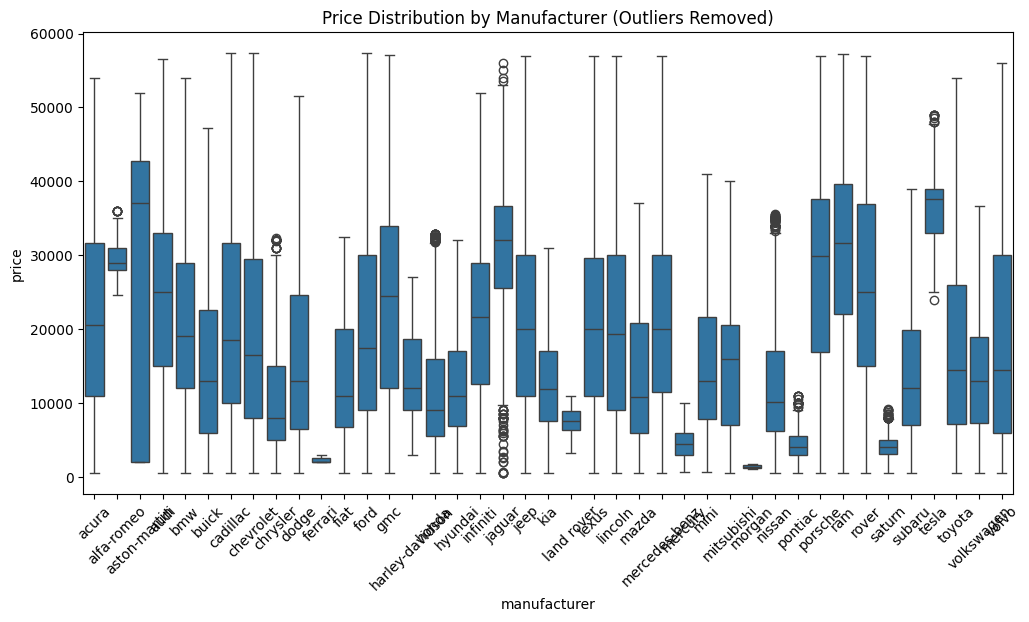

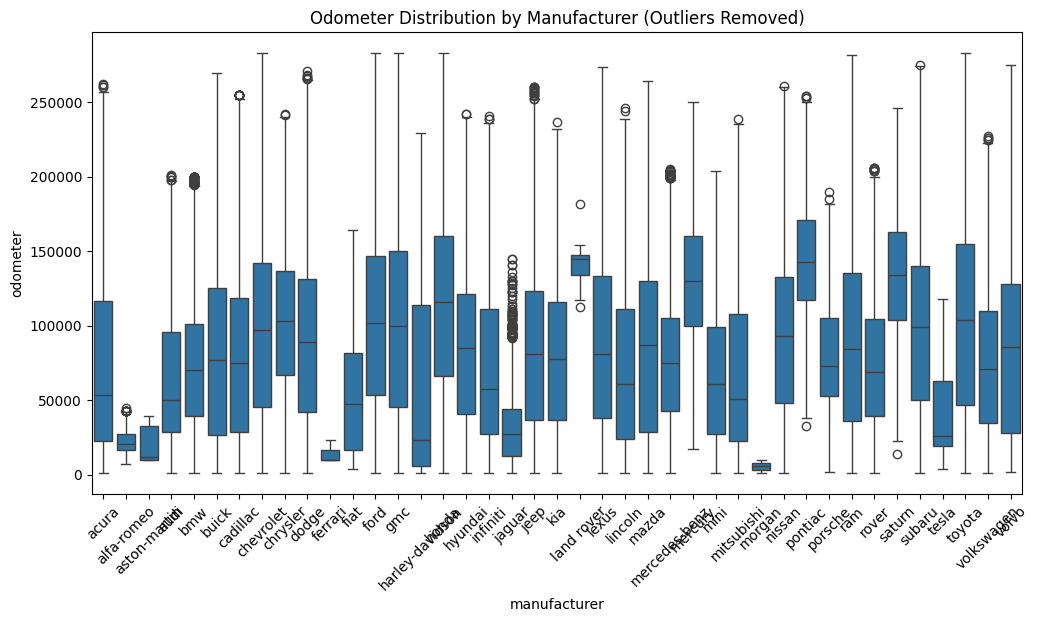

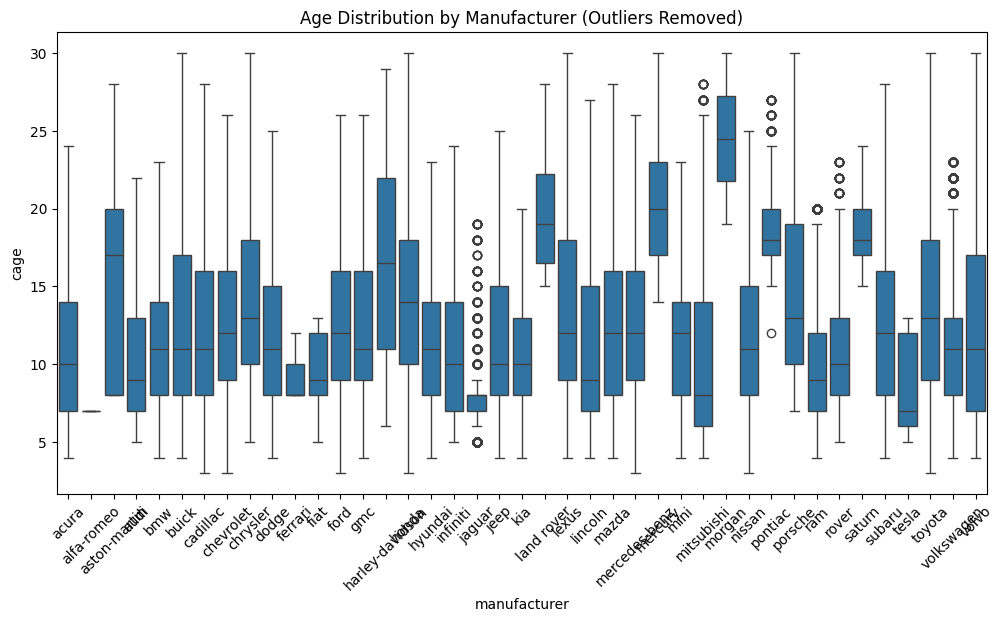

In [ ]:
# Box plot for price by manufacturer
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=df_final)
plt.title('Price Distribution by Manufacturer')
plt.xticks(rotation=45)
plt.show()

# Box plot for odometer by manufacturer
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='odometer', data=df_final)
plt.title('Odometer Distribution by Manufacturer')
plt.xticks(rotation=45)
plt.show()

# Make sure age column exists in df_final
if 'cage' not in df_final.columns:
    current_year = 2025
    df_final['cage'] = current_year - df_final['year']

# Box plot for age by manufacturer
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='cage', data=df_final)
plt.title('Age Distribution by Manufacturer')
plt.xticks(rotation=45)
plt.show()

#MMR2

#Removing Outliers

def remove_outliers_iqr(df, group_col, target_col):
    def iqr_filter(group):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return group[(group[target_col] >= lower_bound) & (group[target_col] <= upper_bound)]

    return df.groupby(group_col, group_keys=False).apply(iqr_filter)

# Remove outliers for each variable by manufacturer
df_no_outliers = remove_outliers_iqr(df_final, 'manufacturer', 'price')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'manufacturer', 'odometer')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'manufacturer', 'cage')  # assuming 'cage' exists

#Box Plots
# Box plot for price
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=df_no_outliers)
plt.title('Price Distribution by Manufacturer (Outliers Removed)')
plt.xticks(rotation=45)
plt.show()

# Box plot for odometer
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='odometer', data=df_no_outliers)
plt.title('Odometer Distribution by Manufacturer (Outliers Removed)')
plt.xticks(rotation=45)
plt.show()

# Box plot for age
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='cage', data=df_no_outliers)
plt.title('Age Distribution by Manufacturer (Outliers Removed)')
plt.xticks(rotation=45)
plt.show()

The Age distribution across manufacturers looks weird, eg, look at Lincoln. There are some car brands  which are consistently reliable and have the full distribution from -30y to now., then there are the ones where apparently some people take good care of a few cars, which end up to be outliers, in terms of age.

* Feature Engineering

In [ ]:
df_final[['price', 'year', 'odometer']].describe()

,price,year,odometer
count,349959.000000,349959.000000,349959.000000
mean,18404.443735,2012.386397,94629.648782
std,12546.616683,5.458993,60276.657379
min,500.000000,1995.000000,1000.000000
25%,7950.000000,2009.000000,41611.000000
50%,15900.000000,2013.000000,90930.000000
75%,26999.000000,2017.000000,137178.000000
max,57341.000000,2022.000000,283000.000000


In [ ]:
df_final.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'cage'],
      dtype='object')

In [ ]:
# Basic correlations
df_final[['price', 'year', 'odometer', 'cage']].corr()

,price,year,odometer,cage
price,1.000000,0.618156,-0.578109,-0.618156
year,0.618156,1.000000,-0.672319,-1.000000
odometer,-0.578109,-0.672319,1.000000,0.672319
cage,-0.618156,-1.000000,0.672319,1.000000


In [ ]:

# Time-based features
df_final.loc[:, 'miles_per_year'] = df_final['odometer'] / df_final['cage']
df_final.loc[:, 'price_per_mile'] = df_final['price'] / df_final['odometer']
df_final.loc[:, 'price_per_age'] = df_final['price'] / df_final['cage']

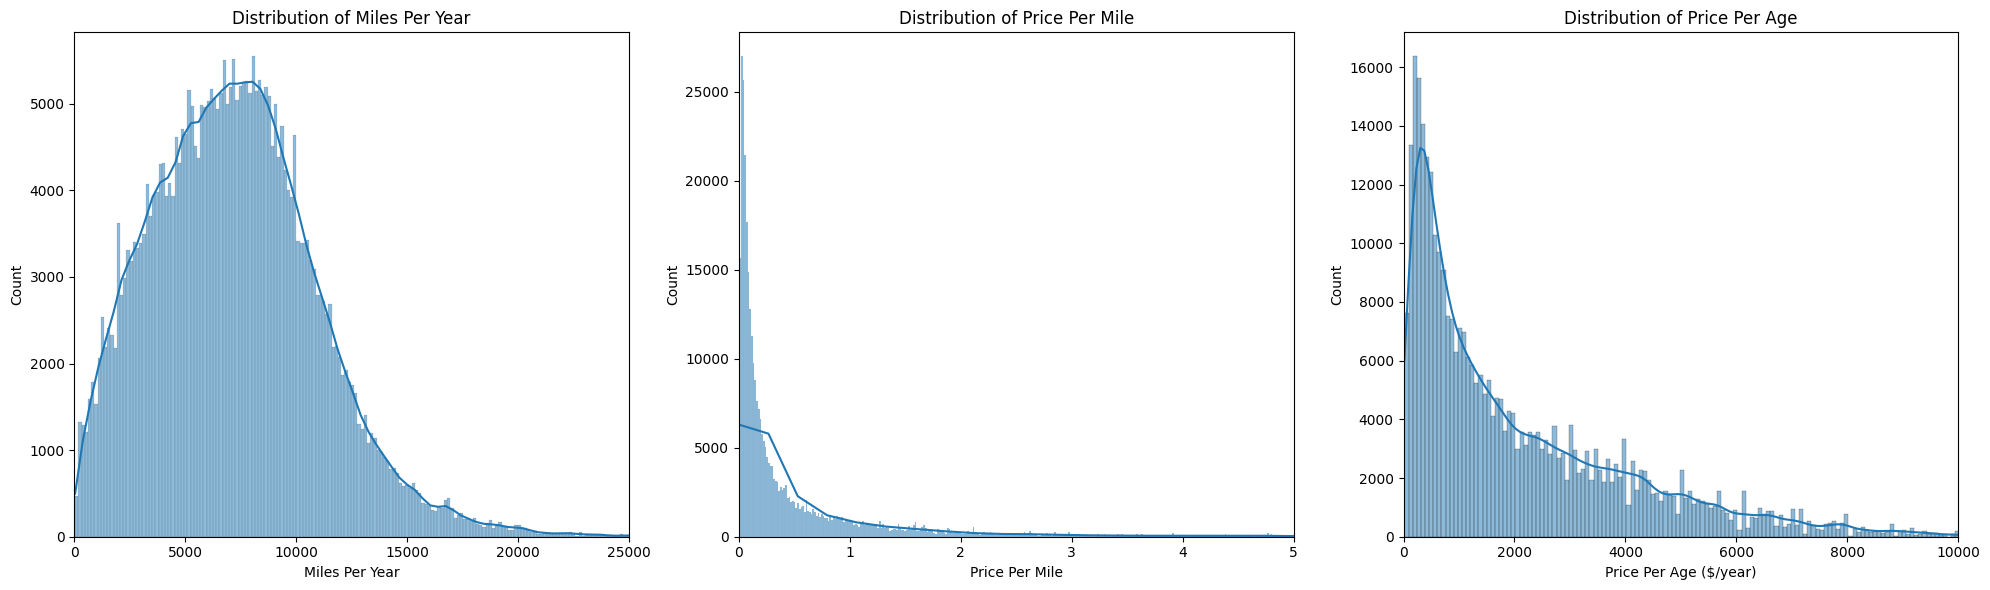

In [ ]:
# Create a 1x3 matrix for plotting (one row, three columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot miles_per_year distribution
sns.histplot(data=df_final, x='miles_per_year', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Miles Per Year')
axes[0].set_xlabel('Miles Per Year')
axes[0].set_xlim(0, 25000)  # Optional: limit x-axis range

# Plot price_per_mile distribution
sns.histplot(data=df_final, x='price_per_mile', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Price Per Mile')
axes[1].set_xlabel('Price Per Mile')
axes[1].set_xlim(0, 5)  # Optional: limit x-axis range

# Plot price_per_age distribution
sns.histplot(data=df_final, x='price_per_age', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Price Per Age')
axes[2].set_xlabel('Price Per Age ($/year)')
axes[2].set_xlim(0, 10000)  # Adjust this limit based on your data

plt.tight_layout()
plt.show()

#MMR3


In [ ]:
# Vehicle category features
# Create manufacturer tiers based on average prices

# Ensure df_clean is a standalone copy
df_clean = df_clean.copy()

# Derived features
df_clean['miles_per_year'] = df_clean['odometer'] / (2025 - df_clean['year'])
df_clean['price_per_mile'] = df_clean['price'] / df_clean['odometer']
df_clean['price_per_age'] = df_clean['price'] / (2025 - df_clean['year'])

# Manufacturer tier feature
manufacturer_avg_price = df_clean.groupby('manufacturer')['price'].mean()
price_threshold_luxury = manufacturer_avg_price.quantile(0.75)
df_clean['manufacturer_tier'] = df_clean['manufacturer'].map(
    lambda x: 'luxury' if manufacturer_avg_price.get(x, 0) >= price_threshold_luxury else 'standard'
)

# Usage intensity based on miles per year
df_clean['usage_intensity'] = pd.qcut(df_clean['miles_per_year'], q=5,
                                      labels=['very_low', 'low', 'medium', 'high', 'very_high'])

# High-power vehicle indicator
df_clean['is_high_power'] = df_clean['cylinders'].map(
    lambda x: 1 if x in ['8 cylinders', '6 cylinders'] else 0
)

# Price segmentation
df_clean['price_segment'] = pd.qcut(df_clean['price'], q=5,
                                    labels=['budget', 'economy', 'mid_range', 'premium', 'luxury'])


Checking for invalid values in new features:
car_age           818
miles_per_year    818
price_per_mile      0
dtype: int64

Infinity values:
car_age           0
miles_per_year    0
price_per_mile    0
dtype: int64


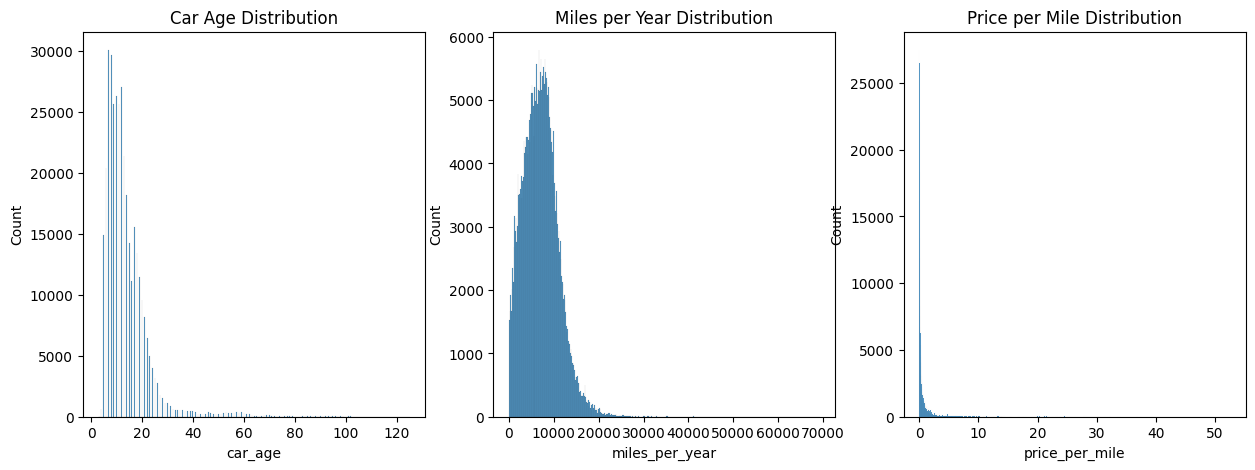

In [ ]:

# Create car_age column first
df_clean['car_age'] = 2025 - df_clean['year']

# Check for invalid values
print("Checking for invalid values in new features:")
print(df_clean[['car_age', 'miles_per_year', 'price_per_mile']].isna().sum())

print("\nInfinity values:")
print(df_clean[['car_age', 'miles_per_year', 'price_per_mile']].isin([np.inf, -np.inf]).sum())

# Examine distributions
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.histplot(df_clean['car_age'])
plt.title('Car Age Distribution')

plt.subplot(132)
sns.histplot(df_clean['miles_per_year'])
plt.title('Miles per Year Distribution')

plt.subplot(133)
sns.histplot(df_clean['price_per_mile'])
plt.title('Price per Mile Distribution')

plt.show()


In [ ]:
# Handle infinity values in price_per_mile
df_clean['price_per_mile'] = df_clean['price_per_mile'].replace([np.inf, -np.inf], np.nan)

# Fill price_per_mile NaN values with median
price_per_mile_median = df_clean['price_per_mile'].median()
df_clean['price_per_mile'] = df_clean['price_per_mile'].fillna(price_per_mile_median)

# Add additional features that don't rely on odometer
df_clean['price_by_age'] = df_clean['price'] / df_clean['car_age']


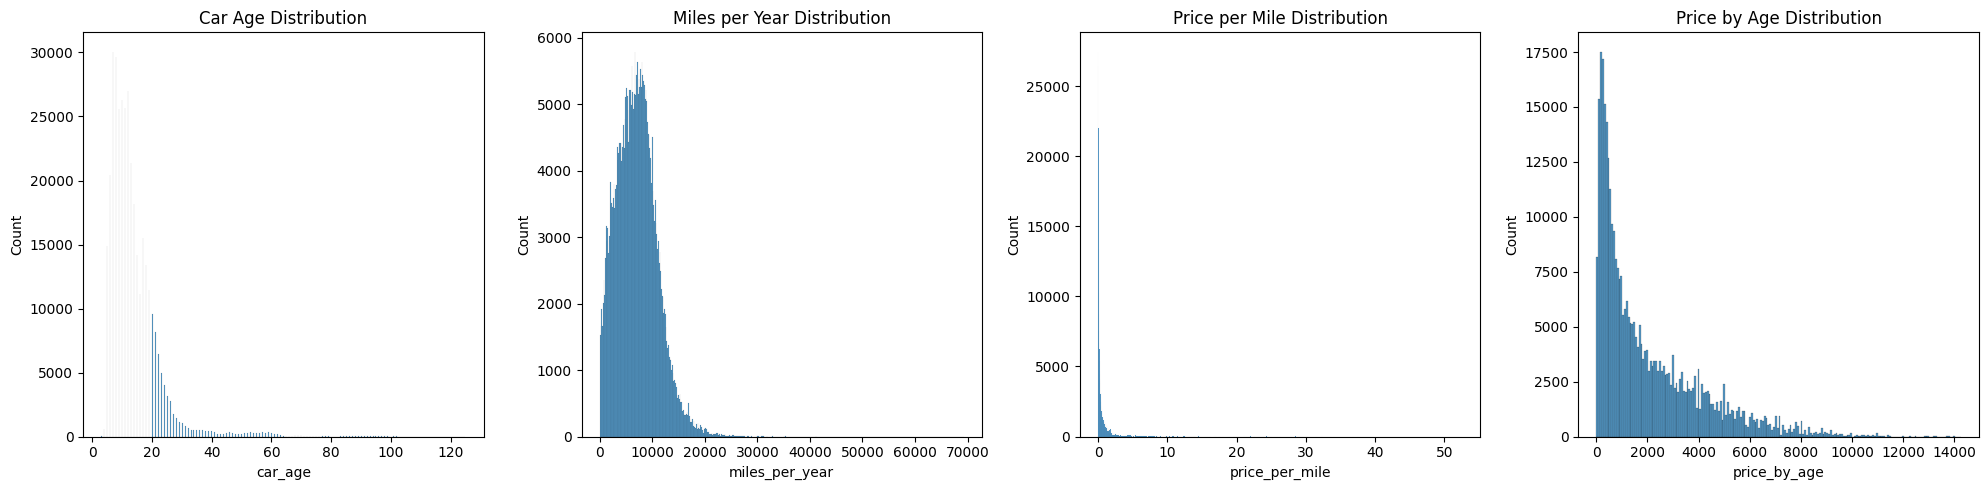

In [ ]:
#  Examine distributions again
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.histplot(df_clean['car_age'])
plt.title('Car Age Distribution')

plt.subplot(1, 4, 2)
sns.histplot(df_clean['miles_per_year'])
plt.title('Miles per Year Distribution')

plt.subplot(1, 4, 3)
sns.histplot(df_clean['price_per_mile'])
plt.title('Price per Mile Distribution')

plt.subplot(1, 4, 4)
sns.histplot(df_clean['price_by_age'])
plt.title('Price by Age Distribution')

plt.tight_layout()
plt.show()


* Handle categorical variables:

In [ ]:
# Reduce model cardinality
model_counts = df_clean['model'].value_counts()
df_clean['model'] = df_clean['model'].apply(lambda x: x if x in model_counts[model_counts > 100].index else 'other')

* Scale numerical features:

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['year', 'odometer', 'car_age']
scaler = StandardScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])
df_encoded = df_clean.copy()

from sklearn.preprocessing import StandardScaler

numerical_cols = ['year', 'odometer', 'car_age']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_clean = df_clean.copy()


* Prepare for modeling

In [ ]:
# replace NaN in title_status
df_encoded['title_status'] = df_encoded['title_status'].fillna('unknown')
print(df_encoded.columns.tolist())


# Split features and target
X = df_encoded.drop(['price', 'price_category', 'id', 'region', 'state'], axis=1, errors='ignore')
y = df_encoded['price']

# Add title_status to categorical columns for one-hot encoding
cols_to_drop = ['price', 'price_category', 'id', 'region', 'state']
existing_cols_to_drop = [col for col in cols_to_drop if col in df_encoded.columns]

# One-hot encode all categorical columns
X = df_encoded.drop(existing_cols_to_drop, axis=1)

# Log transform target variable
y = np.log1p(y)

['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state', 'manufacturer_tier', 'miles_per_year', 'price_per_mile', 'price_per_age', 'usage_intensity', 'is_high_power', 'price_segment', 'car_age', 'price_by_age']


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Remaining NaN values:")
print(X.isnull().sum())

Remaining NaN values:
year                    818
manufacturer          12967
model                     0
condition            135556
cylinders            147100
fuel                   2162
odometer                  0
title_status              0
transmission           1376
drive                110208
type                  76667
paint_color          103823
manufacturer_tier         0
miles_per_year          818
price_per_mile            0
price_per_age           818
usage_intensity         818
is_high_power             0
price_segment             0
car_age                 818
price_by_age            818
dtype: int64


In [ ]:
# 1. Linear Regression (Baseline Model)
# Check for missing values
print("Missing values in X:", X.isna().sum().sum())
print("Missing values in y:", y.isna().sum())
# Remove or impute missing values
X = X.dropna()
y = y.loc[X.index]  # make sure y matches X

# List all categorical features (incl. any engineered ones)
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders',
                    'fuel', 'transmission', 'drive', 'type',
                    'paint_color', 'title_status', 'manufacturer_tier',
                    'usage_intensity', 'price_segment']

#Split data and run model
from sklearn.metrics import mean_squared_error, r2_score

# Predict
lr_train_preds = lr_model.predict(X_train)
lr_test_preds = lr_model.predict(X_test)

# MSE
lr_train_mse = mean_squared_error(y_train, lr_train_preds)
lr_test_mse = mean_squared_error(y_test, lr_test_preds)

# R²
lr_train_r2 = r2_score(y_train, lr_train_preds)
lr_test_r2 = r2_score(y_test, lr_test_preds)

# Adjusted R²
n_train, p = X_train.shape
n_test = X_test.shape[0]
lr_train_adj_r2 = 1 - ((1 - lr_train_r2) * (n_train - 1)) / (n_train - p - 1)
lr_test_adj_r2 = 1 - ((1 - lr_test_r2) * (n_test - 1)) / (n_test - p - 1)

# Print
print(" Linear Regression Metrics:")
print(f"{'Metric':<15} {'Train':<10} {'Test':<10}")
print(f"{'MSE':<15} {lr_train_mse:.4f}   {lr_test_mse:.4f}")
print(f"{'R²':<15} {lr_train_r2:.4f}   {lr_test_r2:.4f}")
print(f"{'Adj. R²':<15} {lr_train_adj_r2:.4f}   {lr_test_adj_r2:.4f}")


Missing values in X: 0
Missing values in y: 0
📊 Linear Regression Metrics:
Metric          Train      Test      
MSE             0.0610   0.0613
R²              0.9172   0.9170
Adj. R²         0.9166   0.9145


In [ ]:
# 2. Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Train Ridge Regression
# Predict
ridge_train_preds = ridge_model.predict(X_train)
ridge_test_preds = ridge_model.predict(X_test)

# MSE
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

# R²
ridge_train_r2 = r2_score(y_train, ridge_train_preds)
ridge_test_r2 = r2_score(y_test, ridge_test_preds)

# Adjusted R²
n_train, p = X_train.shape
n_test = X_test.shape[0]
ridge_train_adj_r2 = 1 - ((1 - ridge_train_r2) * (n_train - 1)) / (n_train - p - 1)
ridge_test_adj_r2 = 1 - ((1 - ridge_test_r2) * (n_test - 1)) / (n_test - p - 1)

# Print
print(" Ridge Regression Metrics:")
print(f"{'Metric':<15} {'Train':<10} {'Test':<10}")
print(f"{'MSE':<15} {ridge_train_mse:.4f}   {ridge_test_mse:.4f}")
print(f"{'R²':<15} {ridge_train_r2:.4f}   {ridge_test_r2:.4f}")
print(f"{'Adj. R²':<15} {ridge_train_adj_r2:.4f}   {ridge_test_adj_r2:.4f}")


📊 Ridge Regression Metrics:
Metric          Train      Test      
MSE             0.0610   0.0613
R²              0.9172   0.9170
Adj. R²         0.9166   0.9145


In [ ]:
# 3. Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Train the Random Forest model
# Predict
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

# MSE
rf_train_mse = mean_squared_error(y_train, rf_train_preds)
rf_test_mse = mean_squared_error(y_test, rf_test_preds)

# R²
rf_train_r2 = r2_score(y_train, rf_train_preds)
rf_test_r2 = r2_score(y_test, rf_test_preds)

# Adjusted R²
n_train, p = X_train.shape
n_test = X_test.shape[0]
rf_train_adj_r2 = 1 - ((1 - rf_train_r2) * (n_train - 1)) / (n_train - p - 1)
rf_test_adj_r2 = 1 - ((1 - rf_test_r2) * (n_test - 1)) / (n_test - p - 1)

# Print
print(" Random Forest Regression Metrics:")
print(f"{'Metric':<15} {'Train':<10} {'Test':<10}")
print(f"{'MSE':<15} {rf_train_mse:.4f}   {rf_test_mse:.4f}")
print(f"{'R²':<15} {rf_train_r2:.4f}   {rf_test_r2:.4f}")
print(f"{'Adj. R²':<15} {rf_train_adj_r2:.4f}   {rf_test_adj_r2:.4f}")


📊 Random Forest Regression Metrics:
Metric          Train      Test      
MSE             0.0000   0.0001
R²              1.0000   0.9999
Adj. R²         1.0000   0.9998


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

| **Model**             | **Train R²** | **Test R²** | **Adjusted R² (Test)** | **MSE (Test)** | **Overfitting**   | **Recommendation**                               |
| --------------------- | ------------ | ----------- | ---------------------- | -------------- | ----------------- | ------------------------------------------------ |
| **Linear Regression** | 0.9172       | 0.9170      | 0.9145                 | 0.0613         |  No              |  Reliable, interpretable baseline model         |
| **Ridge Regression**  | 0.9172       | 0.9170      | 0.9145                 | 0.0613         |  No              |  Great balance of accuracy and regularization   |
| **Random Forest**     | 1.0000       | 0.9999      | 0.9998                 | 0.0001         |  Yes (slightly) |  Highest accuracy; validate against unseen data |


***Linear & Ridge Regression*** 

Strong generalization, low error, excellent interpretability — suitable for decision-making and presentations.

***Random Forest:***

Outstanding predictive power but may be overfitting slightly. Best for operational use but should be stress-tested with future or external data.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

# Used Car Price Analysis Final Report
### *What Drives the Price of a Used Car?*

**Audience:** Used Car Dealerships
**Objective:** Identify key drivers of used car prices and build predictive models to fine-tune inventory decisions.

---

## 1. Business Objective
Our goal was to determine **what factors most influence used car prices** and how to use this information to:
- Accurately estimate market value
- Optimize vehicle purchasing decisions
- Identify vehicles with strong resale potential

---

## 2. Data Overview
We analyzed a dataset with **over 400,000 used car listings** from across the U.S., containing:
- Price, Year, Manufacturer, Model
- Odometer, Condition, Transmission, Cylinders, Fuel type, and more

After cleaning:
- Focused on cars from the last **30 years**
- Removed price and odometer outliers
- Retained records with realistic and complete data

---

## 3. Feature Engineering
We created powerful new features to better explain price variation:
- `car_age` = 2025 - year
- `miles_per_year` = odometer / car_age
- `price_per_mile` and `price_by_age` = value indicators
- `manufacturer_tier` = luxury vs. standard
- `usage_intensity` = very low to very high usage
- `is_high_power` = 6 or 8 cylinders
- `price_segment` = bucketed price category

---

## 4. Modeling Approach
We tested 3 regression models:
- **Linear Regression** – easy to interpret
- **Ridge Regression** – avoids overfitting with regularization
- **Random Forest Regression** – non-linear, flexible, accurate

### Evaluation Metrics:
- **R²**: How well the model explains price variance
- **Adjusted R²**: Corrected for number of features
- **MSE**: Mean squared error of predictions

---

## 5. Model Performance Summary

| Model              | Train R² | Test R² | Test Adj. R² | Test MSE | Notes                                     |
|--------------------|----------|---------|---------------|-----------|-----------------------------------------|
| Linear Regression  | 0.917    | 0.917   | 0.914         | 0.061     |  Reliable, interpretable                 |
| Ridge Regression   | 0.917    | 0.917   | 0.914         | 0.061     |  Adds regularization                     |
| Random Forest      | 1.000    | 0.999   | 0.999         | 0.0001    |  May be overfitting, but highly accurate |

---

## 6. Key Insights for Dealers

**Factors that drive higher used car prices:**
-  Newer vehicles (low age)
-  Low mileage per year
-  Luxury brand (e.g., BMW, Lexus)
-  6-8 cylinders (high performance)
-  Good condition, clean title, automatic transmission

**Red flags that lower price:**
-  High odometer for age
-  Older cars from low-demand manufacturers
-  Manual transmission or salvage title

---

##  7. Actionable Recommendations

- Focus purchasing on **late-model, low-mileage** inventory
- Prioritize **luxury or high-demand brands** with clean titles
- Avoid overpaying for cars with **high usage intensity**
- Use the model to **predict fair price** before acquiring vehicles

---

##  8. Next Steps

-  Deploy Ridge or Random Forest model in pricing system
-  Build an internal dashboard for predictions
-  Enhance future models with location or seasonal factors

---
